# Music genre classification 

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import librosa
import seaborn as sns
import librosa.display
from IPython.display import Audio

## Read Data

In [3]:
# load csv file
df = pd.read_csv("E:\\VAIBHAV\\personal\\music genres\\features_3_sec.csv")

In [4]:
df.head() # first 5 entries

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

## Exploratory data Analysis

In [5]:
df.shape

(9990, 60)

In [6]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [8]:
df.filename.value_counts

<bound method IndexOpsMixin.value_counts of 0       blues.00000.0.wav
1       blues.00000.1.wav
2       blues.00000.2.wav
3       blues.00000.3.wav
4       blues.00000.4.wav
              ...        
9985     rock.00099.5.wav
9986     rock.00099.6.wav
9987     rock.00099.7.wav
9988     rock.00099.8.wav
9989     rock.00099.9.wav
Name: filename, Length: 9990, dtype: object>

In [9]:
df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611           4.349644e+05               543.854449   
min                472.741636           8.118813e+02               499.162910   
25%               1630.680158           1.231961e+05              1887.455790   
50%               2208.628236           2.650692e+05              2230.575595   
75%               2712.581884           5.624152e+05              2588.340505   
max               5432.534406           4.794119e+06              3708.147554   

       spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean   mfcc16_var  \
count            9.990000e+03   9990.000000  ...  9990.000000  9990.000000   
mean             1.182711e+05   4566.076592  ...     1.448240    49.988755   
std              1.013505e+05   1642.065335  ...     5.735149    34.442816   
min              1.183520e+03    658.336276  ...   -26.850016     1.325786   
25%              4.876553e+04   3378.311110  ...    -2.227478    29.584894   
50%              8.996072e+04   4631.377892  ...     1.461623    41.702393   
75%              1.585674e+05   5591.634521  ...     5.149752    59.274619   
max              1.235143e+06   9487.446477  ...    39.144405   683.932556   

       mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  mfcc19_mean  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     -4.198706    51.962753     0.739943    52.488851    -2.497306   
std       5.677379    36.400669     5.181313    38.177120     5.111799   
min     -27.809795     1.624544   -20.733809     3.437439   -27.448456   
25%      -7.951722    29.863448    -2.516638    29.636197    -5.734123   
50%      -4.443021    42.393583     0.733772    41.831377    -2.702366   
75%      -0.726945    61.676964     3.888734    62.033906     0.514246   
max      34.048843   529.363342    36.970322   629.729797    31.365425   

        mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  
mean     54.973829    -0.917584    57.322614  
std      41.585677     5.253243    46.444212  
min       3.065302   -35.640659     0.282131  
25%      30.496412    -4.004475    30.011365  
50%      43.435253    -1.030939    44.332155  
75%      65.328602     2.216603    68.210421  
max    1143.230591    34.212101   910.473206  

[8 rows x 58 columns]

##  Audio Files

In [10]:
# load the audio file
audio_recording = "E:\\VAIBHAV\\personal\\gtzan\\blues\\blues.00000.wav"
data , sr = librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [11]:
data, sr = librosa.load(audio_recording)

In [12]:
librosa.load(audio_recording, sr=45600) # sample rate

(array([ 0.0071735 ,  0.01332307,  0.01644646, ..., -0.07312676,
        -0.06151061, -0.03034332], dtype=float32),
 45600)

In [13]:
# Parameters
gtzan_dir = './gtzan/'
song_samples = 45600
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [14]:
genres

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

## Python Display Audio

In [15]:
import IPython
IPython.display.Audio(data, rate=sr)

In [16]:
df.label.value_counts() # check label

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

In [17]:
df.label.isna().sum()

0

In [18]:
df.isnull().sum() # checking for missing values

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'blues'),
  Text(1, 0, 'classical'),
  Text(2, 0, 'country'),
  Text(3, 0, 'disco'),
  Text(4, 0, 'hiphop'),
  Text(5, 0, 'jazz'),
  Text(6, 0, 'metal'),
  Text(7, 0, 'pop'),
  Text(8, 0, 'reggae'),
  Text(9, 0, 'rock')])

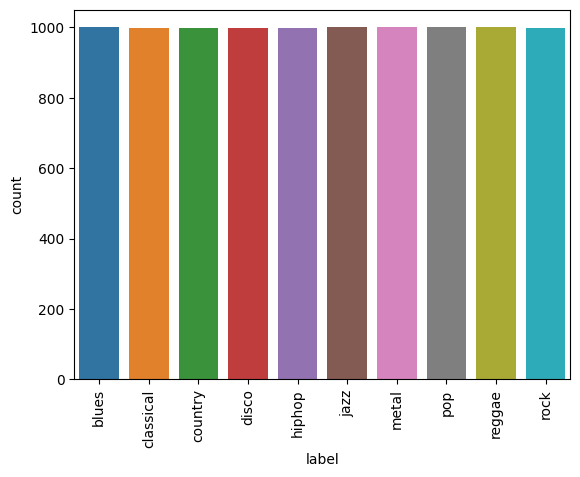

In [19]:
sns.countplot(x =df.label) # plot the categories
plt.xticks(rotation=90)

## Visualizing Audio files

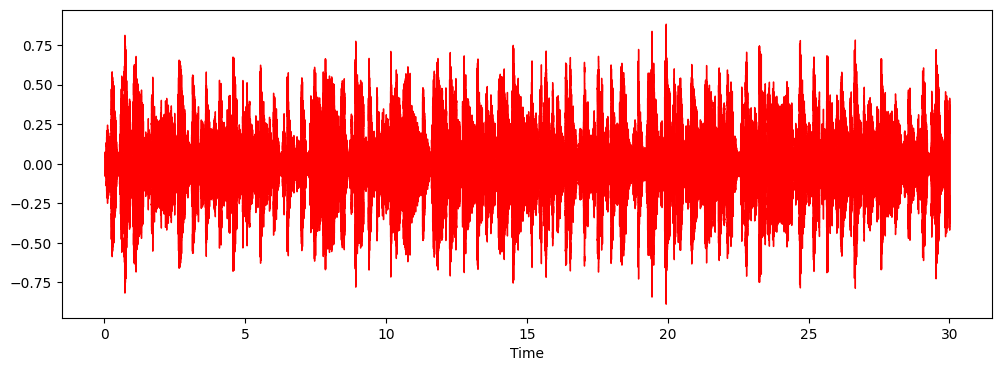

In [20]:
## Visualizing Audio files
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, color="r")
plt.show()

Blue


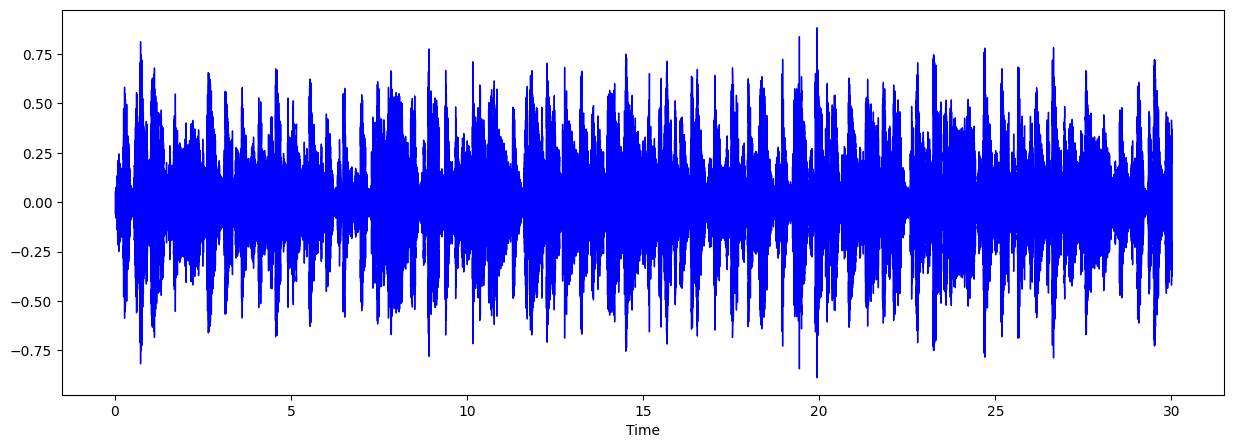

In [21]:
 plt.figure(figsize=(15, 5))
data, sr = librosa.load(audio_recording)
librosa.display.waveshow(data, sr=sr, color = "blue")

print("Blue")

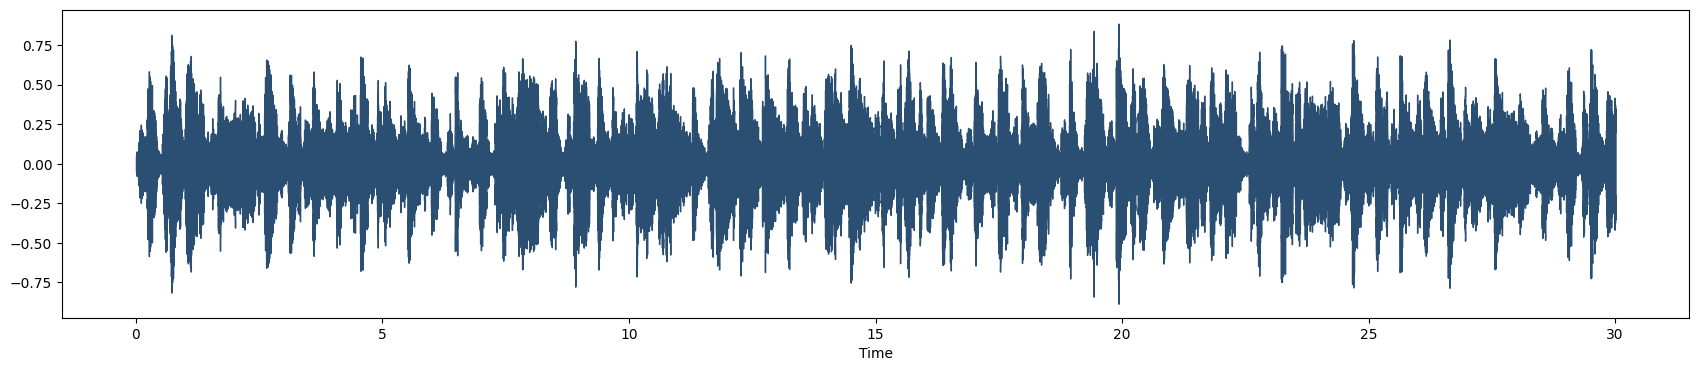

Blue


In [22]:
plt.figure(figsize=(21, 4))
librosa.display.waveshow(data, color = '#2B4F72')
plt.show()

print('Blue')

C:\Users\akash\AppData\Local\Temp\ipykernel_12456\4078992204.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr =sr , x_axis='time', y_axis='hz')


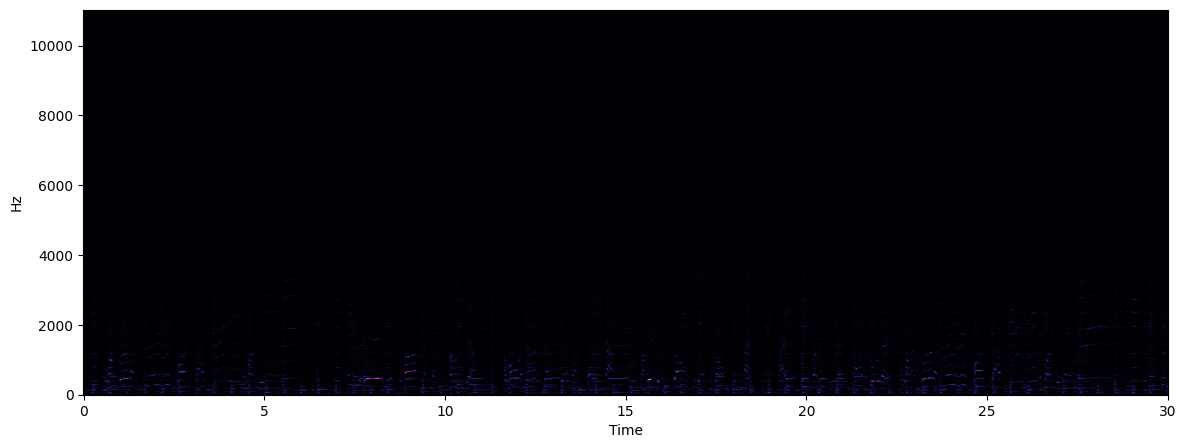

In [23]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(stft, sr =sr , x_axis='time', y_axis='hz')

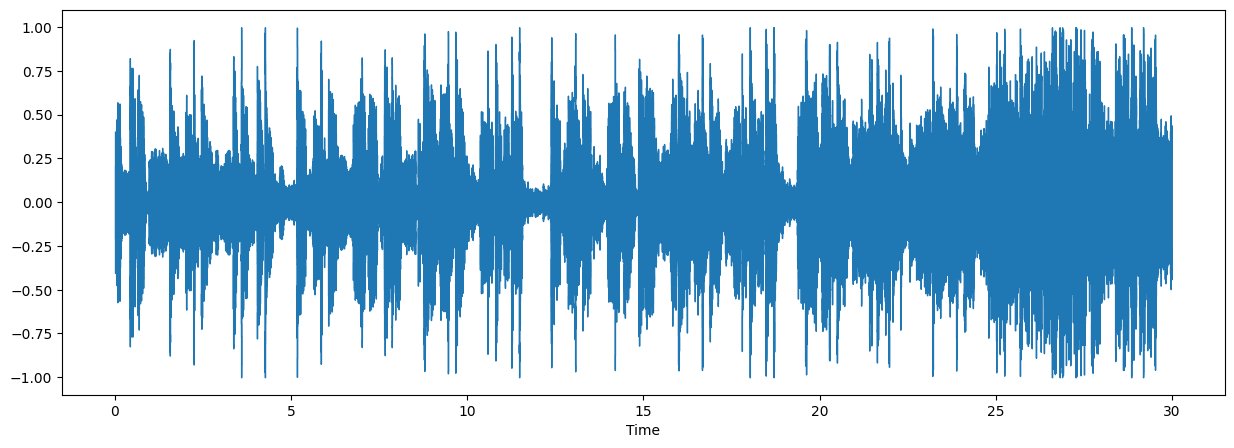

Pop


In [24]:
path = "E:\\VAIBHAV\personal\\gtzan\\pop\\pop.00000.wav"
plt.figure(figsize=(15,5))
x, sr= librosa.load(path)
librosa.display.waveshow(x, sr=sr)
plt.show()

print("Pop")

In [25]:
import IPython
IPython.display.Audio(path, rate=sr)

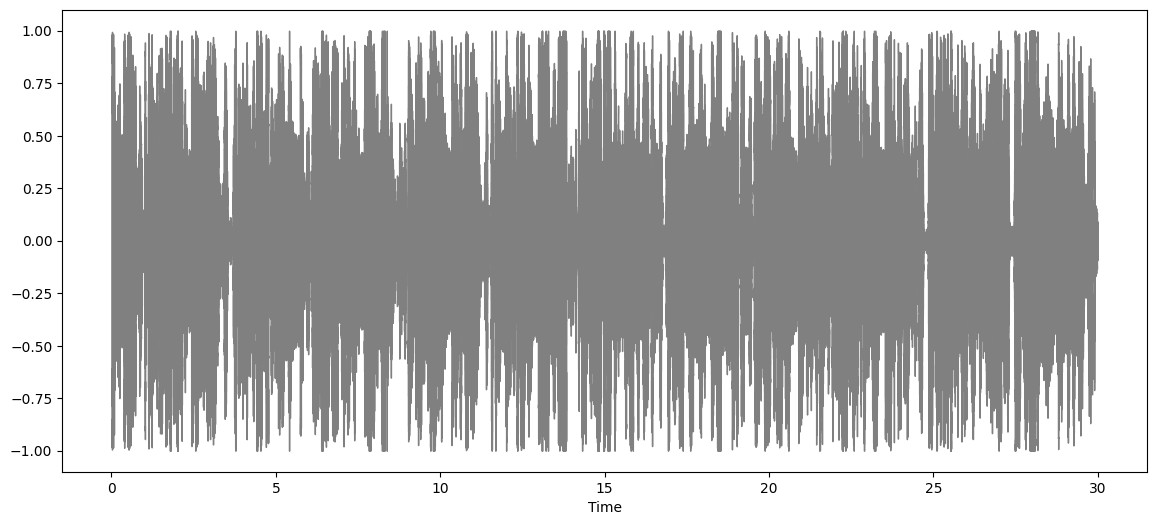

Hiphop


In [26]:
hphop = "E:\\VAIBHAV\\personal\\gtzan\\hiphop\\hiphop.00001.wav"
plt.figure(figsize=(14, 6))
y , sr = librosa.load(hphop)
librosa.display.waveshow(y, sr=sr, color = "#808080")
plt.show()

print("Hiphop")

In [27]:
IPython.display.Audio(y, rate=sr)

Blues


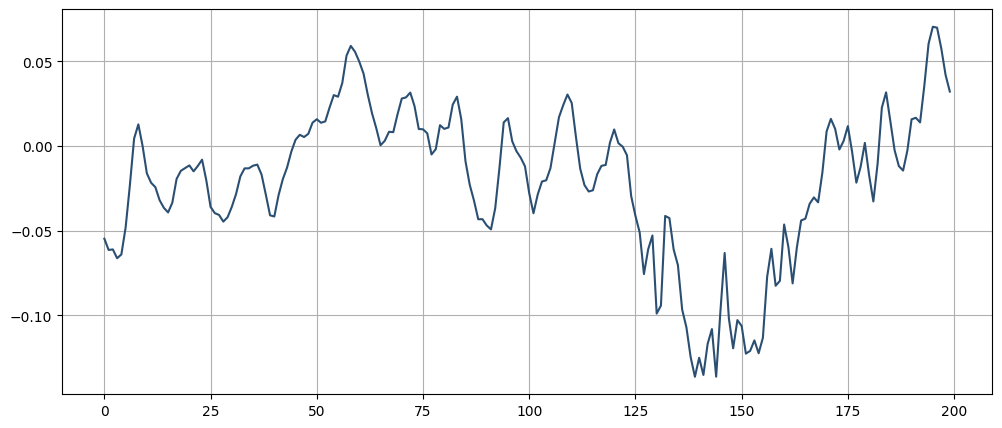

In [28]:
# Zero Crossing Rate 

start = 1000
end = 1200
plt.figure(figsize=(12, 5))
plt.plot(data[start:end], color ='#2B4F72')
plt.grid()

print('Blues')

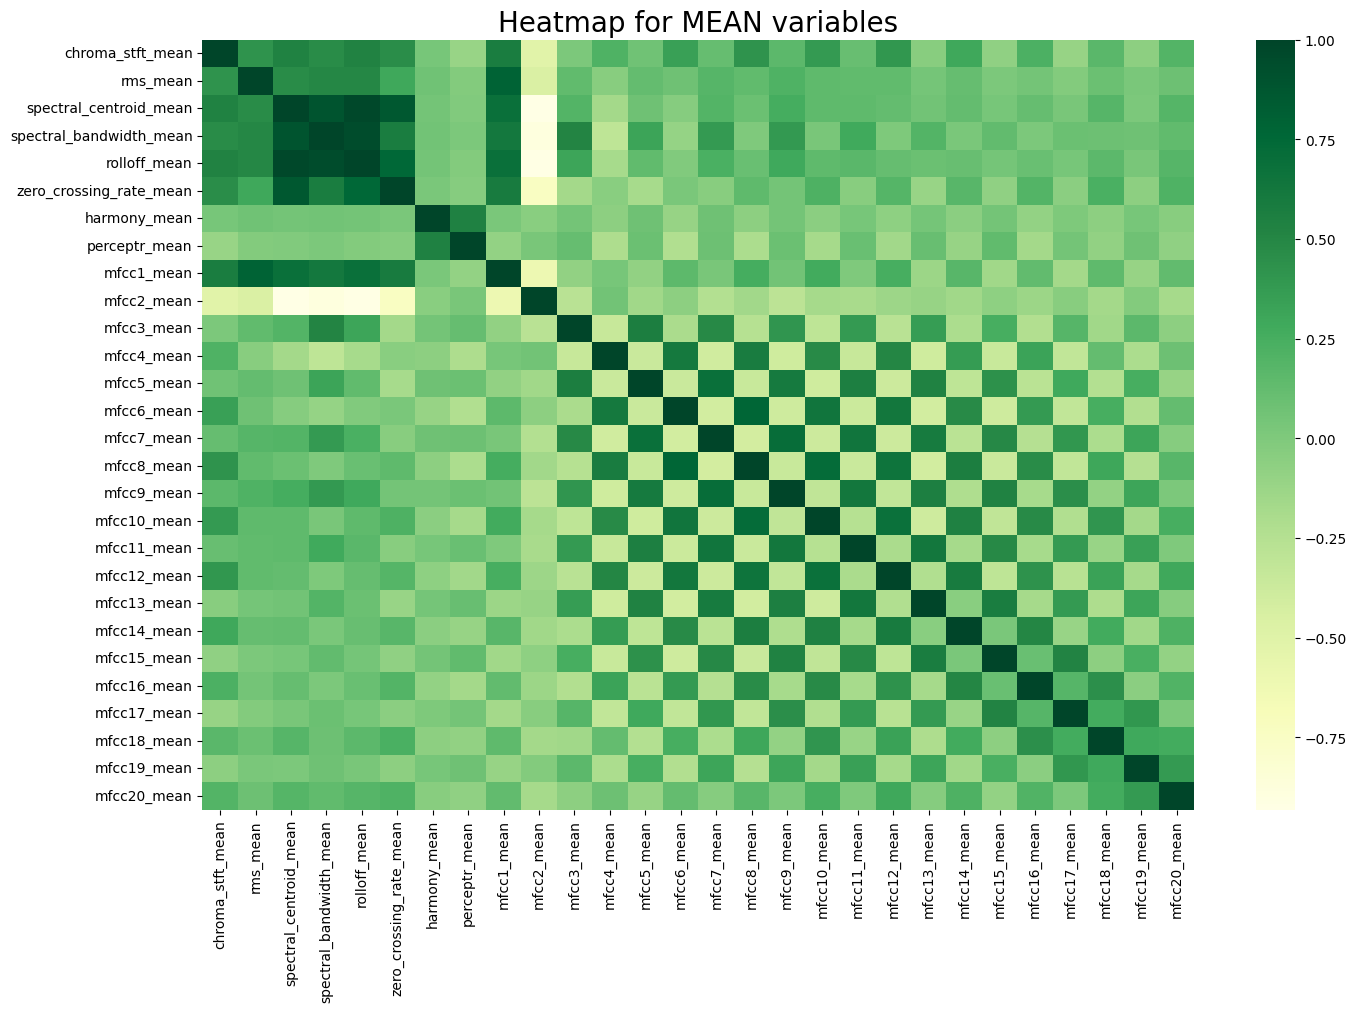

In [29]:
import numpy as np
import seaborn as sns

spike_cols = [col for col in df.columns if 'mean' in col]

f, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(df[spike_cols].corr(), cmap='YlGn')

plt.title('Heatmap for MEAN variables' , fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

## Data Preprocessing

In [30]:
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing
from sklearn import preprocessing

In [31]:
label_encoder = LabelEncoder()

In [32]:
df['label'] = label_encoder.fit_transform(df['label'])

In [33]:
x = df.drop(['label', 'filename'], axis=1)
y = df['label']

In [34]:
cols = x.columns
minmax = preprocessing.MinMaxScaler()
np_scaled = minmax.fit_transform(x)

# new data frame with new scaled data.
x = pd.DataFrame(np_scaled, columns = cols)

In [35]:
x.head(3)

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0     0.0          0.355399         0.716757  0.293133  0.107955   
1     0.0          0.367322         0.670347  0.253040  0.044447   
2     0.0          0.373159         0.728067  0.296753  0.141663   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                0.262173               0.034784                 0.459205   
1                0.270969               0.018716                 0.470831   
2                0.265293               0.023073                 0.494051   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean  mfcc16_var  \
0                0.094130      0.346153  ...     0.363613    0.056198   
1                0.052261      0.363722  ...     0.468596    0.092912   
2                0.059922      0.378215  ...     0.479681    0.096704   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0     0.397172    0.066062     0.371828    0.055344     0.380831    0.026797   
1     0.351681    0.074001     0.362068    0.076365     0.418452    0.082414   
2     0.420979    0.050639     0.400536    0.067509     0.433742    0.043841   

   mfcc20_mean  mfcc20_var  
0     0.506746    0.047781  
1     0.593029    0.065548  
2     0.546264    0.036062  

[3 rows x 58 columns]

In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

## Model Training

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=32)

In [38]:
x_train.shape , y_train.shape

((7992, 58), (7992,))

In [39]:
x_test.shape , y_test.shape

((1998, 58), (1998,))

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [41]:
model_K = KNeighborsClassifier(n_neighbors=5,weights='uniform')

In [42]:
model_K.fit(x_train , y_train)

KNeighborsClassifier()

In [43]:
# Predict on dataset 
print(model_K.predict(x_test))

[8 7 6 ... 4 8 2]


In [44]:
# Calculate the accuracy of the model of k-nn
print(model_K.score(x_test, y_test))

0.9069069069069069


In [45]:
y_knn_train = model_K.predict(x_train)
y_knn_test = model_K.predict(x_test)

print("Accuracy Score :",accuracy_score(y_train,y_knn_train))
print("Accuracy Score :", accuracy_score(y_test,y_knn_test))



Accuracy Score : 0.9474474474474475
Accuracy Score : 0.9069069069069069


In [46]:
print(classification_report(y_test, y_knn_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       182
           1       0.89      0.97      0.93       207
           2       0.84      0.91      0.87       198
           3       0.87      0.94      0.90       192
           4       0.94      0.90      0.92       197
           5       0.90      0.87      0.89       215
           6       0.98      0.94      0.96       197
           7       0.94      0.87      0.90       197
           8       0.90      0.94      0.92       205
           9       0.91      0.83      0.87       208

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



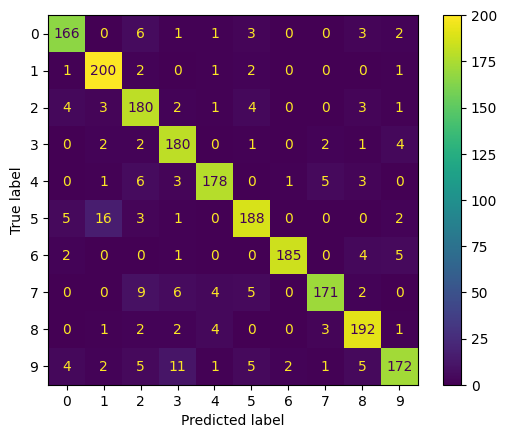

In [47]:
cm = confusion_matrix(y_test, y_knn_test, labels=model_K.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_K.classes_)

dis.plot()
plt.show()

In [48]:
model_XGB = XGBClassifier()

In [49]:
model_XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [50]:
model_XGB.score(x_test,y_test)

0.8938938938938938

In [51]:
y_xgb_train = model_XGB.predict(x_train)
y_xgb_test = model_XGB.predict(x_test)

print('Accuracy Score :', accuracy_score(y_train,y_xgb_train))
print('Accuracy Score :', accuracy_score(y_test, y_xgb_test))

Accuracy Score : 0.9992492492492493
Accuracy Score : 0.8938938938938938


In [52]:
print(classification_report(y_true=y_test,y_pred=y_xgb_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       182
           1       0.92      0.93      0.93       207
           2       0.82      0.88      0.85       198
           3       0.90      0.85      0.88       192
           4       0.93      0.91      0.92       197
           5       0.90      0.89      0.90       215
           6       0.93      0.90      0.92       197
           7       0.92      0.89      0.91       197
           8       0.91      0.91      0.91       205
           9       0.83      0.88      0.85       208

    accuracy                           0.89      1998
   macro avg       0.90      0.89      0.89      1998
weighted avg       0.89      0.89      0.89      1998



In [53]:
model_svm = SVC(  kernel='rbf',
    degree=3,
    gamma='scale')

In [54]:
model_svm.fit(x_train,y_train)

SVC()

In [55]:
y_svm_train = model_svm.predict(x_train)
y_svm_test = model_svm.predict(x_test)

print('Accuracy score :', accuracy_score(y_train, y_svm_train))
print('Accuracy score :', accuracy_score(y_test, y_svm_test))

Accuracy score : 0.7777777777777778
Accuracy score : 0.7427427427427428


In [56]:
print(classification_report(y_test, y_svm_test
                           ))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       182
           1       0.86      0.94      0.90       207
           2       0.69      0.66      0.68       198
           3       0.64      0.68      0.66       192
           4       0.76      0.68      0.72       197
           5       0.82      0.80      0.81       215
           6       0.80      0.86      0.83       197
           7       0.83      0.80      0.82       197
           8       0.72      0.68      0.70       205
           9       0.64      0.56      0.60       208

    accuracy                           0.74      1998
   macro avg       0.74      0.74      0.74      1998
weighted avg       0.74      0.74      0.74      1998



In [57]:
alogs=[model_K,model_XGB,model_svm]
alog_names=['KNeighborsClassifier', 'XGBClassifier', 'SVM']

accuracy_scored=[]

# fit predict for each alogritms
for item in alogs:
    item.predict(x_test)
    accuracy_scored.append(accuracy_score(y_test, item.predict(x_test)))

In [58]:
# show results in a DataFrame
result = pd.DataFrame(accuracy_scored, columns=['Accuracy'])
result['Algos']=alog_names
result.sort_values('Accuracy', ascending=False)

Accuracy                 Algos
0  0.906907  KNeighborsClassifier
1  0.893894         XGBClassifier
2  0.742743                   SVM

### The best result shows The KNeighborsClassifier with an Accuracy of 90.69%.